# COMP3222/6246 Machine Learning Technologies (2019/20)
# Solution of Coursework 1

Consider the diabetes data set from the scikit-learn python package. The structure of the data set is as follows: Each data point consists of 10 baseline variables (i.e., feature vector x): age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each diabetes patient, as well as the response of interest (i.e., output variable y), a quantitative measure of disease progression one year after baseline.

Your task is to identify a good machine learning model to predict the value of y from a given feature vector x. To do so, you can use the above mentioned data set to train your model.

**1.** What is the python code to load the diabetes data set?

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

**2.** Uniformly randomly split the data set to training and test data with 80% for training and 20% for testing. Perform linear regression on the training data. What are the model parameters of the solution? What is the RMSE for this model on the training set? Apply this to the test data as well. What is the RMSE there? Repeat the uniformly random split 10 times and write down in a table each time the model parameters, RMSE for training, and RMSE for test data. How much do these values differ?

In [2]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for _ in range(10):
    
    X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    print()
    lin_reg = LinearRegression()
    lin_reg.fit(scaled_X_train, Y_train)
    print("Hyper-parameters:", lin_reg.intercept_, lin_reg.coef_)
    
    Y_pred_train = lin_reg.predict(scaled_X_train)
    Y_pred_test = lin_reg.predict(scaled_X_test)
    
    rmse_train = math.sqrt(mean_squared_error(Y_train, Y_pred_train))
    print("Train RMS:", rmse_train)
    
    rmse_test = math.sqrt(mean_squared_error(Y_test, Y_pred_test))
    print("Test RMS:", rmse_test)
    print("Difference:", rmse_test - rmse_train)



Hyper-parameters: 152.96033994334277 [ -1.55111077 -12.38941212  23.96334328  15.31390911 -53.10647288
  31.08515011  16.69503909  17.51975235  40.28659377   4.22500358]
Train RMS: 53.172674411690195
Test RMS: 55.69413143782653
Difference: 2.521457026136332

Hyper-parameters: 153.08498583569406 [ -1.87296717 -11.63023155  23.86474236  17.97113429 -19.43800014
  11.86136633  -3.67856736   2.65175182  31.93779435   1.14699542]
Train RMS: 51.998929699886794
Test RMS: 59.81949940353726
Difference: 7.820569703650463

Hyper-parameters: 150.29461756373937 [  1.75481875  -9.65302234  25.3221383   15.80631014 -46.97095782
  27.07218318  13.06060803  15.74934376  37.32435741   2.41030309]
Train RMS: 53.35327512769647
Test RMS: 54.81187957024428
Difference: 1.4586044425478093

Hyper-parameters: 150.1473087818697 [ -0.73803334 -10.66047112  25.40910272  14.0657154  -26.14839611
  15.42677628   2.3016077   10.26105114  28.07057468   4.65446826]
Train RMS: 53.658922558588166
Test RMS: 53.7870496559

**3.** Investigate whether linear regression is an appropriate model for this data set. Does linear regression fit the data well? Explain your answer in 1-2 paragraphs (i.e., what can you say from the plot?). Hint: gradually increase the size of training data set, and plot the RMSE for both training and test data.

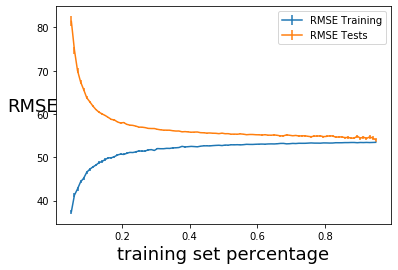

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import math

repetition = 1000
percentages = np.linspace(0.05, 0.95, 100)
mean_rmse_trains = []
mean_rmse_tests = []
ci_rmse_trains = []
ci_rmse_tests = []

for percentage in percentages:
  rmse_trains = []
  rmse_tests = []
  for _ in range(repetition):
    X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=1.0-percentage)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, Y_train)
    
    Y_pred_train = lin_reg.predict(X_train)
    Y_pred_test = lin_reg.predict(X_test)
    
    rmse_train = math.sqrt(mean_squared_error(Y_train, Y_pred_train))
    rmse_test = math.sqrt(mean_squared_error(Y_test, Y_pred_test))
    
    rmse_trains.append(rmse_train)
    rmse_tests.append(rmse_test)
    
  mean_rmse_train = np.mean(rmse_trains)
  mean_rmse_test = np.mean(rmse_tests)
  ci_rmse_train = 1.96 * np.std(rmse_trains) / math.sqrt(repetition)
  ci_rmse_test = 1.96 * np.std(rmse_tests) / math.sqrt(repetition)
  
  mean_rmse_trains.append(mean_rmse_train)
  mean_rmse_tests.append(mean_rmse_test)
  ci_rmse_trains.append(ci_rmse_train)
  ci_rmse_tests.append(ci_rmse_test)

import matplotlib.pyplot as plt
plt.errorbar(percentages, mean_rmse_trains, yerr=ci_rmse_trains, label="RMSE Training")
plt.errorbar(percentages, mean_rmse_tests, yerr=ci_rmse_tests, label="RMSE Tests")

plt.xlabel("training set percentage", fontsize=18)
plt.ylabel("RMSE", fontsize=18, rotation=0)
plt.legend()
plt.show()

In general, linear regression fits the data well which was demonstrated by (1) a low difference between RMSE on training set and RMSE on testing set, and (2) given an increasing training datapoints, the RMSE on testing set decreases gracefully.

**4.** Use polynomial regression with degrees d = 2,5 and 10 (Still with 80% of data for training and 20% for testing). Plot their predictions in the same plot. Explain what you can see within 1-2 paragraphs.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def create_poly(d, x, y):
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    poly_train_data = poly_features.fit_transform(x)
    lin_reg = LinearRegression()
    lin_reg.fit(poly_train_data, y)
    return lin_reg

def predict_poly(p, d, test):
    poly_features = PolynomialFeatures(degree=d, include_bias=False)
    poly_test_data = poly_features.fit_transform(test)
    return p.predict(poly_test_data)

def compute_rmse(predict, actual):
    return math.sqrt(mean_squared_error(actual, predict))

X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

pol_reg2 = create_poly(2, scaled_X_train, Y_train)
pol_reg5 = create_poly(5, scaled_X_train, Y_train)
pol_reg10 = create_poly(10, scaled_X_train, Y_train)

Y_train_pred2 = predict_poly(pol_reg2, 2, scaled_X_train)
Y_train_pred5 = predict_poly(pol_reg5, 5, scaled_X_train)
Y_train_pred10 = predict_poly(pol_reg10, 10, scaled_X_train)

Y_test_pred2 = predict_poly(pol_reg2, 2, scaled_X_test)
Y_test_pred5 = predict_poly(pol_reg5, 5, scaled_X_test)
Y_test_pred10 = predict_poly(pol_reg10, 10, scaled_X_test)

print("Degree 2: Train RMSE =", compute_rmse(Y_train_pred2, Y_train), ", Test RMSE =", compute_rmse(Y_test_pred2, Y_test))
print("Degree 5: Train RMSE =", compute_rmse(Y_train_pred5, Y_train), ", Test RMSE =", compute_rmse(Y_test_pred5, Y_test))
print("Degree 10: Train RMSE =", compute_rmse(Y_train_pred10, Y_train), ", Test RMSE =", compute_rmse(Y_test_pred10, Y_test))

Degree 2: Train RMSE = 48.06974292662504 , Test RMSE = 59.3764535933219
Degree 5: Train RMSE = 3.978302254405894e-12 , Test RMSE = 627.8633144860745
Degree 10: Train RMSE = 1.0729043995804305e-09 , Test RMSE = 24857.38687815741


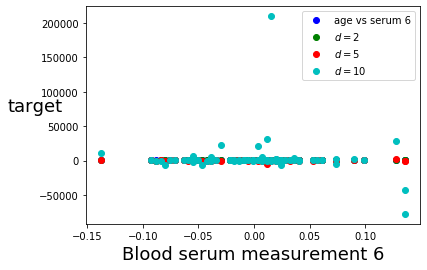

In [6]:
# select feature's index and plot
feat=9
plt.plot(X_test[:, feat], Y_test, "bo", label="age vs serum 6")
plt.plot(X_test[:, feat], Y_test_pred2, "go", label="$d=2$")
plt.plot(X_test[:, feat], Y_test_pred5, "ro", label="$d=5$")
plt.plot(X_test[:, feat], Y_test_pred10, "co", label="$d=10$")

plt.xlabel("Blood serum measurement 6", fontsize=18)
plt.ylabel("target", fontsize=18, rotation=0)
plt.legend()
plt.show()

In general, polynomial regression performs worse than linear regression since it overfits on the training set. The higher degree it is, the higher RMSE on test set and the lower RMSE on train set it yields.

**5.** Assuming that we still use 80% of the diabetes data set for training and 20% for testing, evaluate and explain the performance of Lasso with different alpha values within 1-2 paragraphs.

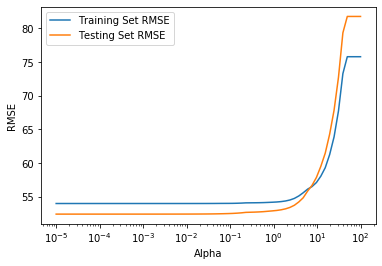

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# partition dataset
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

# scale features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# grid search on the alpha parameter
granularity = 70
train_rmse_grid = np.zeros(granularity)
test_rmse_grid = np.zeros(granularity)
alpha_grid = np.logspace(-5, 2, num=granularity, base=10.0)

for i, alpha_lasso in enumerate(alpha_grid):
  
  # fit a lasso regressor
  lasso_reg = Lasso(alpha=alpha_lasso)
  lasso_reg.fit(scaled_X_train, Y_train)
  
  # compute RMSE
  Y_pred_train = lasso_reg.predict(scaled_X_train)
  Y_pred_test = lasso_reg.predict(scaled_X_test)
  train_rmse_grid[i] = math.sqrt(mean_squared_error(Y_train, Y_pred_train))
  test_rmse_grid[i] = math.sqrt(mean_squared_error(Y_test, Y_pred_test))

# plotting
plt.semilogx(alpha_grid, train_rmse_grid, label="Training Set RMSE")
plt.semilogx(alpha_grid, test_rmse_grid, label="Testing Set RMSE")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Performance of Lasso regression (L1 regularisation) heavily depends on the alpha value. If the alpha is too high, the penalty applies to minimisation problem will be large and a lot of coefficients will be eliminated; thus resulting in a large RMSE where the Lasso regression is unable to capture the trend of the data. However, if the alpha is too low, the penalty will be small and thus no coefficients are eleiminated; thus the Lasso might be overfitting.

**6.** What would be the optimal value of alpha for Lasso on this data set? What are the resulted model parameters? Hint: use cross-validation and grid search to find the optimal alpha.

In [8]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

reg = LassoCV().fit(scaled_X_train, Y_train)
Y_pred_train = reg.predict(scaled_X_train)
Y_pred_test = reg.predict(scaled_X_test)
print("Optimal alpha =", reg.alpha_)
print("Train RMSE =", math.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print("Test RMSE =", math.sqrt(mean_squared_error(Y_test, Y_pred_test)))
print("Coefficients =", reg.coef_)

Optimal alpha = 2.240262675937059
Train RMSE = 53.53053398986135
Test RMSE = 56.15859317975826
Coefficients = [  0.          -6.84367938  24.16419391  16.14403784  -1.90915214
  -0.         -10.06163911   0.          20.80783338   1.46106308]


C:\Local\anaconda3\envs\MLTech\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


**7.** Implement a decision tree as a regression model for this data set. Repeat this 10 times. Visualise the best tree up to depth 5 and report the RMSE on both training and test data. What is the reason that we might get different trees and results? Please explain within 1-2 paragraphs.

[1, 65.17590124886883, 63.766902966198344, DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')]
[0, 59.18848398967014, 55.30872342377798, DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')]
[5, 55.11699124460894, 54.121341512367195, DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                     

'apt' is not recognized as an internal or external command,
operable program or batch file.


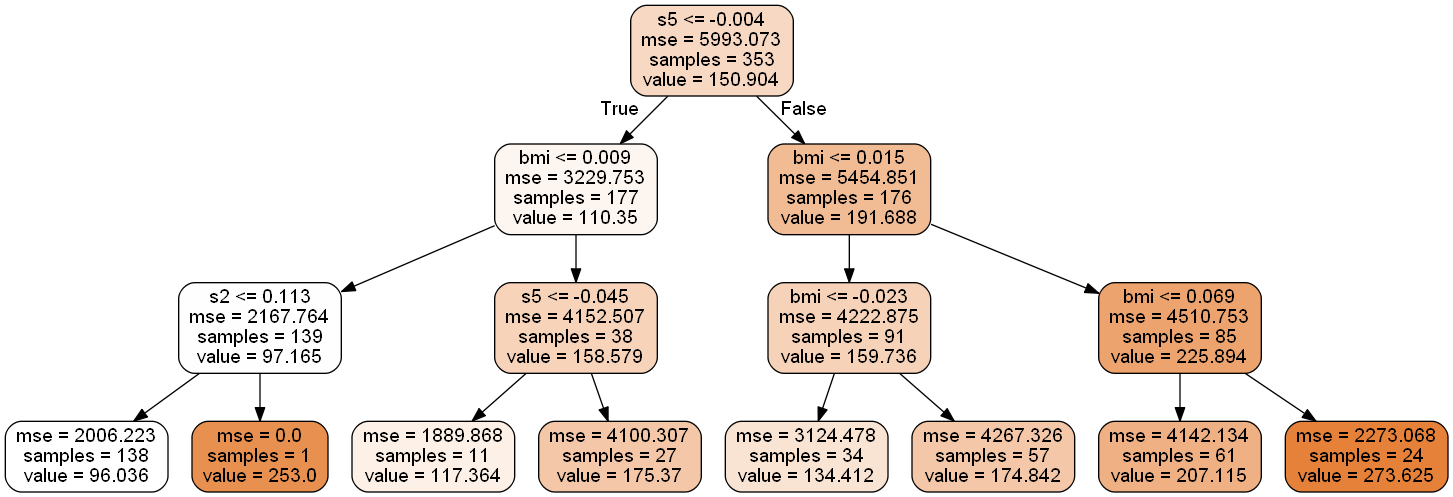

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import numpy as np

# make sure you installed graphviz (exclamation mark is for shell commands)
!apt install graphviz 

def get_best_decision_tree(max_depth=5, repetition=10):
  # repeat 10 times
  rmse_train = np.zeros(repetition)
  rmse_test = np.zeros(repetition)
  trees = []
  
  for i in range(repetition):

    # partition dataset
    X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, train_size=0.8, test_size=0.2)

    # fit a decision tree regressor
    tree_reg = DecisionTreeRegressor(max_depth=max_depth)
    tree_reg.fit(X_train, Y_train)
    trees.append(tree_reg)

    # compute RMSE
    Y_pred_train = tree_reg.predict(X_train)
    Y_pred_test = tree_reg.predict(X_test)
    rmse_train[i] = math.sqrt(mean_squared_error(Y_train, Y_pred_train))
    rmse_test[i] = math.sqrt(mean_squared_error(Y_test, Y_pred_test))

  # find the "best" decision tree
  best = np.argmin(rmse_test)
  return [best, rmse_train[best], rmse_test[best], trees[best]] 

print(get_best_decision_tree(1, 10))
print(get_best_decision_tree(2, 10))
print(get_best_decision_tree(3, 10))
print(get_best_decision_tree(4, 10))
print(get_best_decision_tree(5, 10))


best, _, _, best_tree = get_best_decision_tree(3, 10)
# show it off
export_graphviz(best_tree,
                out_file="my_spiky_tree.dot",
                feature_names=diabetes.feature_names,
                rounded=True,
                filled=True)

# convert dot file to png file.
!dot -Tpng my_spiky_tree.dot -o my_spiky_tree.png

# display the tree
Image(filename="my_spiky_tree.png")

If the random seed which is used to permute features at each split is not fixed, then we will get a different tree at each time the tree is trained.